## Project on Movie Rating Prediction

### The movie rating prediction project aims to develop a machine learning model that predicts the ratings of movies based on various features such as genre, director, actors, and user votes. The model will leverage historical movie data to learn patterns and relationships between these features and movie ratings, enabling accurate predictions for unseen movies.


## Objective : 

### Develop a machine learning model to predict movie ratings 

## Import Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset

movie_raw = pd.read_csv("./IMDb Movies India.csv",encoding='latin1')

In [3]:
# Creating copy of the dataset

df = movie_raw.copy()

In [4]:
# Checking the no of observation and variable
df.shape

(15509, 10)

####  Examine the few feature and records of the dataframe 

In [5]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [6]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [7]:
# Examine the columns

df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

#### Examine the data types

In [8]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [9]:
# Examine the unique value in columns

for i in df.columns:
    print(f" Unique value of columns {i} is : {df[i].unique()}")
    print()

 Unique value of columns Name is : [' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 Unique value of columns Year is : [nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945)' '(1961)' '(1965)' '(1938)'
 '(1941)' '(1931)' '(1937)

In [10]:
# count of the unique value in columns
count = 0
for i in df.columns:
    count=count+1
    print(f" No of unique value in columns {i} is : {df[i].nunique()}")
    print()

 No of unique value in columns Name is : 13838

 No of unique value in columns Year is : 102

 No of unique value in columns Duration is : 182

 No of unique value in columns Genre is : 485

 No of unique value in columns Rating is : 84

 No of unique value in columns Votes is : 2034

 No of unique value in columns Director is : 5938

 No of unique value in columns Actor 1 is : 4718

 No of unique value in columns Actor 2 is : 4891

 No of unique value in columns Actor 3 is : 4820



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [12]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


## Exploring the data using data analysis 

In [13]:
# Remove the missing data for data analysis

df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

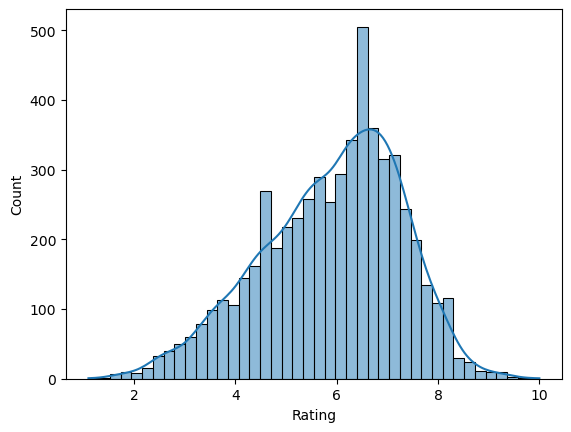

In [15]:
# Checking the distribution of Rating

sns.histplot(df['Rating'],kde=True)
plt.show()

In [16]:
df['Rating'].value_counts()

6.8     200
6.5     192
6.2     190
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: Rating, Length: 83, dtype: int64

<Axes: ylabel='Rating'>

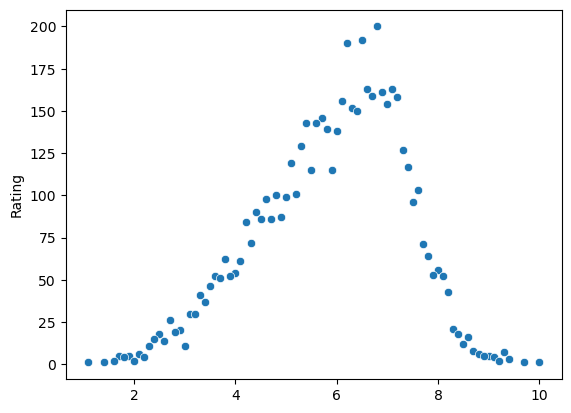

In [17]:
sns.scatterplot(df['Rating'].value_counts())

In [18]:
average_rating_per_director = df.groupby('Director')['Rating'].mean()


In [19]:
average_rating_per_director.sort_values(ascending=False)

Director
Saif Ali Sayeed     10.0
Sriram Raja          9.7
Munni Pankaj         9.4
Suhrud Godbole       9.4
Arvind Pratap        9.4
                    ... 
Navin Batra          1.9
Raajeev Walia        1.8
Stanley D'Costa      1.8
Pramod Mandloi       1.7
Sachindra Sharma     1.6
Name: Rating, Length: 2431, dtype: float64

In [20]:
top_10_directors = average_rating_per_director.sort_values(ascending=False).head(10)


In [21]:
top_10_directors

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Munni Pankaj        9.4
Suhrud Godbole      9.4
Arvind Pratap       9.4
Venkatesh Bk        9.3
Sapna Bhavnani      9.3
Vishwa Bhanu        9.3
Rahul Mallick       9.3
Gautam Joshi        9.3
Name: Rating, dtype: float64

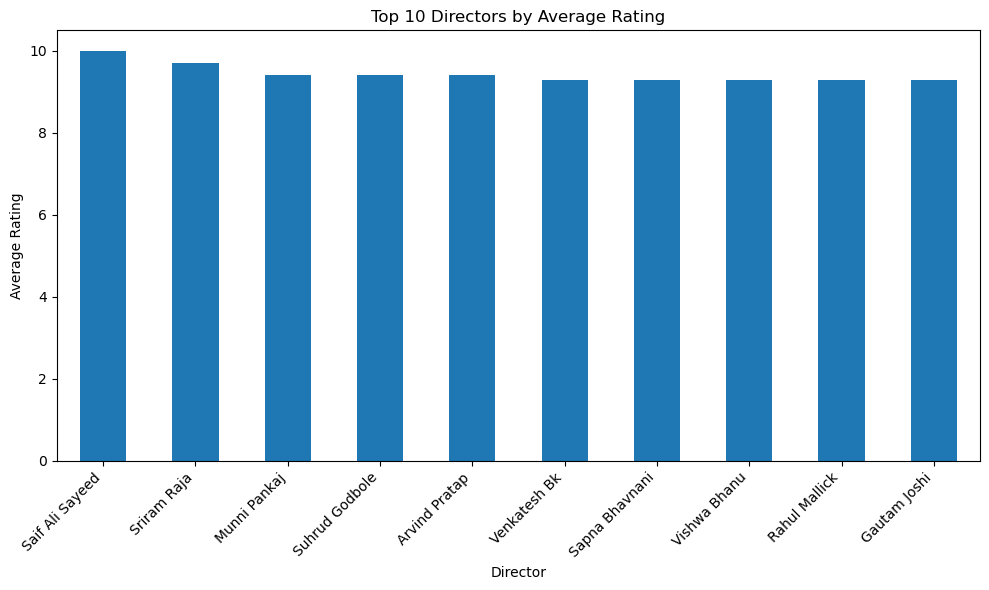

In [22]:
import matplotlib.pyplot as plt

top_10_directors.plot(kind='bar', figsize=(10, 6))  # Customize figure size as needed
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Rating')
plt.xticks(rotation=45, ha='right')  # Rotate long director names for better readability
plt.tight_layout()
plt.show()


In [23]:
average_rating_per_director = df.groupby('Actor 1')['Rating'].mean()
top_10_actor_1 = average_rating_per_director.sort_values(ascending=False).head(10)


In [24]:
top_10_actor_1

Actor 1
Ahaan Jha            10.0
Raj Banerjee          9.7
Nishi Neha Mishra     9.4
Dharmendra Ahir       9.4
Vaibhav Khisti        9.4
Kunj Anand            9.3
Prashant Chaubey      9.3
Vijay Mahar           9.3
Tejaswini Manogna     9.3
Leila Advani          9.3
Name: Rating, dtype: float64

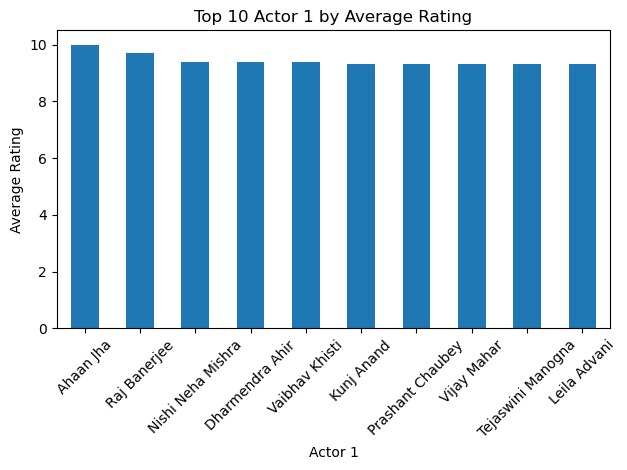

In [25]:
top_10_actor_1.plot(kind='bar')

plt.xlabel('Actor 1')
plt.ylabel('Average Rating')
plt.title('Top 10 Actor 1 by Average Rating')
plt.xticks(rotation=45)  # Rotate long director names for better readability
plt.tight_layout()
plt.show()

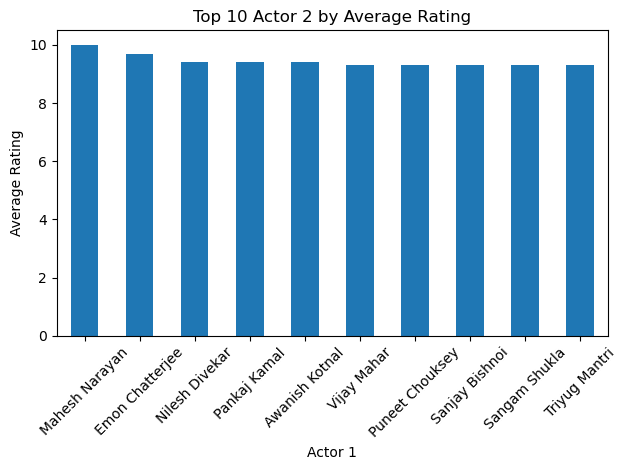

In [26]:
average_rating_per_director = df.groupby('Actor 2')['Rating'].mean()
top_10_actor_2 = average_rating_per_director.sort_values(ascending=False).head(10)
top_10_actor_2.plot(kind='bar')
plt.xlabel('Actor 1')
plt.ylabel('Average Rating')
plt.title('Top 10 Actor 2 by Average Rating')
plt.xticks(rotation=45)  # Rotate long director names for better readability
plt.tight_layout()
plt.show()

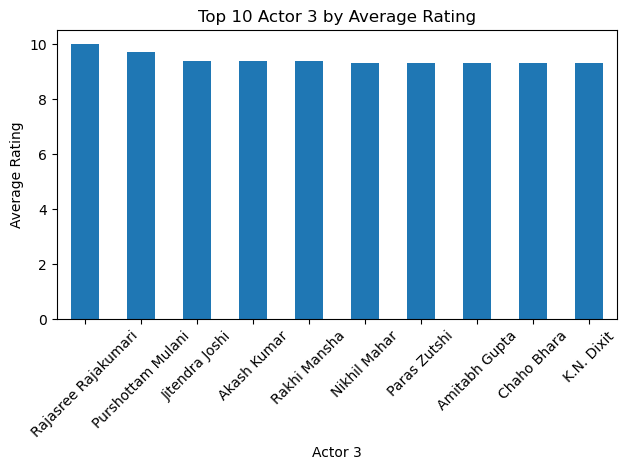

In [27]:
average_rating_per_director = df.groupby('Actor 3')['Rating'].mean()
top_10_actor_3 = average_rating_per_director.sort_values(ascending=False).head(10)
top_10_actor_3.plot(kind='bar')
plt.xlabel('Actor 3')
plt.ylabel('Average Rating')
plt.title('Top 10 Actor 3 by Average Rating')
plt.xticks(rotation=45)  # Rotate long director names for better readability
plt.tight_layout()
plt.show()

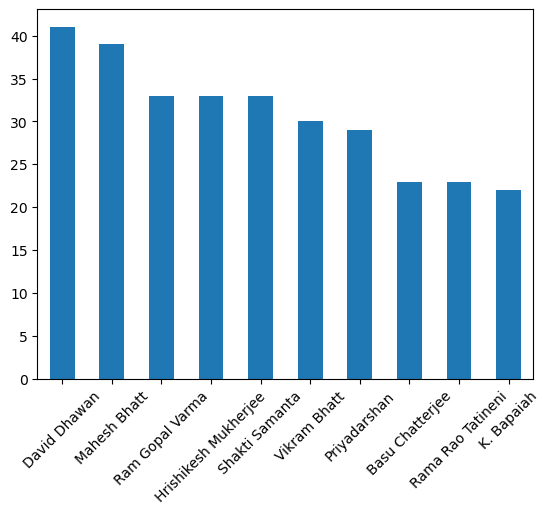

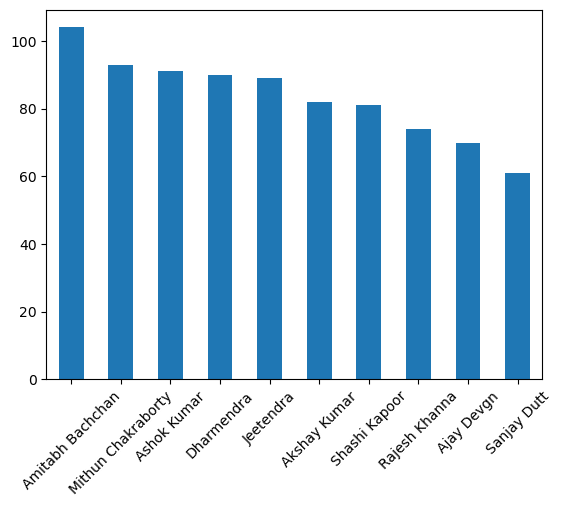

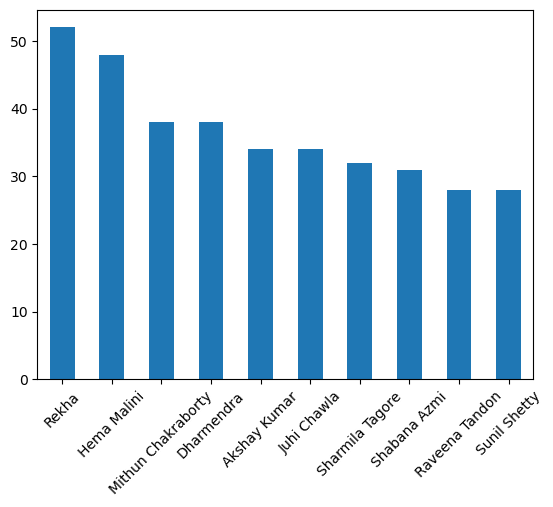

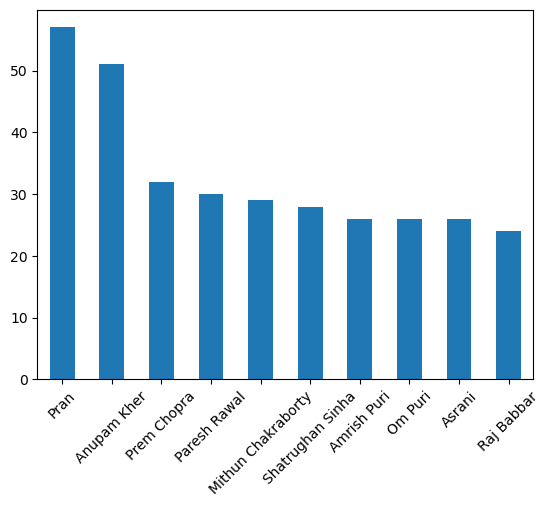

In [28]:
columns = ['Director','Actor 1','Actor 2','Actor 3']

for i in columns:
    df[i].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
    plt.xticks(rotation=45)
    plt.show()

## Data Cleaning

In [30]:
df1=movie_raw.copy()

In [31]:
df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [32]:
# Checking the null value in dataframe

df1.isnull().sum()/len(df1)*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [33]:
df1.drop(['Duration'],inplace=True,axis=1)

In [34]:
df1.isnull().sum()/len(df1)*100

Name         0.000000
Year         3.404475
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [35]:
df1['Votes'].value_counts().sort_values(ascending=False)

8        227
7        224
9        221
6        213
10       175
        ... 
9,418      1
1,043      1
8,146      1
4,669      1
1,496      1
Name: Votes, Length: 2034, dtype: int64

In [36]:
df1['Year'] = pd.to_numeric(df1['Year'], errors='coerce')  # Replace missing values with NaN



In [37]:
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [40]:
from sklearn.impute import SimpleImputer

# ... Data loading and initial analysis ...

# Imputation
# numerical_cols = ['Year','Votes']
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
# imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

df1_imputed = df1.copy()
# df1_imputed[numerical_cols] = imputer_num.fit_transform(df1_imputed[numerical_cols])
df1_imputed[categorical_cols] = imputer_cat.fit_transform(df1_imputed[categorical_cols])




In [42]:
df1_imputed.isnull().sum()

Name            0
Year        15509
Genre           0
Rating       7590
Votes        7589
Director        0
Actor 1         0
Actor 2         0
Actor 3         0
dtype: int64

In [43]:
df1_imputed.drop(['Year'],inplace=True,axis=1)

In [44]:
df1_imputed.isnull().sum()

Name           0
Genre          0
Rating      7590
Votes       7589
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [45]:
df1_imputed.dtypes

Name         object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [46]:
df1_imputed['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

In [47]:
df1_imputed.dtypes

Name         object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [49]:
# Evaluate impact
print("Mean rating before imputation:", df1_imputed['Rating'].mean())

# Imputation - replace missing values with the mean rating
imputer = SimpleImputer(strategy='mean')
df1_imputed['Rating'] = imputer.fit_transform(df1_imputed[['Rating']])

# Evaluate impact
print("Mean rating after imputation:", df1_imputed['Rating'].mean())
print(df1_imputed)


Mean rating before imputation: 5.841621416845562
Mean rating after imputation: 5.841621416845561
                                     Name            Genre    Rating  Votes  \
0                                                    Drama  5.841621    NaN   
1      #Gadhvi (He thought he was Gandhi)            Drama  7.000000    8.0   
2                             #Homecoming   Drama, Musical  5.841621    NaN   
3                                 #Yaaram  Comedy, Romance  4.400000   35.0   
4                       ...And Once Again            Drama  5.841621    NaN   
...                                   ...              ...       ...    ...   
15504                 Zulm Ko Jala Doonga           Action  4.600000    NaN   
15505                               Zulmi    Action, Drama  4.500000  655.0   
15506                           Zulmi Raj           Action  5.841621    NaN   
15507                       Zulmi Shikari           Action  5.841621    NaN   
15508                        Zulm-

In [50]:
df1_imputed.isnull().sum()

Name            0
Genre           0
Rating          0
Votes       11218
Director        0
Actor 1         0
Actor 2         0
Actor 3         0
dtype: int64

In [51]:
# Evaluate impact
print("Mean votes before imputation:", df1_imputed['Votes'].mean())

# Imputation - replace missing values with the mean rating
imputer = SimpleImputer(strategy='mean')
df1_imputed['Votes'] = imputer.fit_transform(df1_imputed[['Votes']])

# Evaluate impact
print("Mean Votes after imputation:", df1_imputed['Votes'].mean())
print(df1_imputed)

Mean votes before imputation: 165.8005127010021
Mean Votes after imputation: 165.8005127010021
                                     Name            Genre    Rating  \
0                                                    Drama  5.841621   
1      #Gadhvi (He thought he was Gandhi)            Drama  7.000000   
2                             #Homecoming   Drama, Musical  5.841621   
3                                 #Yaaram  Comedy, Romance  4.400000   
4                       ...And Once Again            Drama  5.841621   
...                                   ...              ...       ...   
15504                 Zulm Ko Jala Doonga           Action  4.600000   
15505                               Zulmi    Action, Drama  4.500000   
15506                           Zulmi Raj           Action  5.841621   
15507                       Zulmi Shikari           Action  5.841621   
15508                        Zulm-O-Sitam    Action, Drama  6.200000   

            Votes            Director   

In [52]:
df1_imputed.isnull().sum()

Name        0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [53]:
df1_imputed.head()

,Name,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,Drama,5.841621,165.800513,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,"Drama, Musical",5.841621,165.800513,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,Drama,5.841621,165.800513,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Feature Engineering

In [54]:
# Creating new column "Genre_count"

df1_imputed['Genre_Count'] = [len(i.split(',')) for i in df1_imputed['Genre']]

In [55]:
df1_imputed.head()

,Name,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Count
0,,Drama,5.841621,165.800513,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,1
1,#Gadhvi (He thought he was Gandhi),Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1
2,#Homecoming,"Drama, Musical",5.841621,165.800513,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,2
3,#Yaaram,"Comedy, Romance",4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2
4,...And Once Again,Drama,5.841621,165.800513,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,1


In [59]:
# Encoding the categorical feature 

# perform one-hot encoding on the 'Genre' column
!pip install feature-engine
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=['Genre'])
df_encoded = encoder.fit_transform(df1_imputed)

                                              0.0/328.9 kB ? eta -:--:--
     -                                        10.2/328.9 kB ? eta -:--:--
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328.9 kB 1.3 MB/s eta 0:00:01
     ---                                     30.7/328

In [60]:
df_encoded

,Name,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Count,Genre_Drama,"Genre_Drama, Musical",...,"Genre_Comedy, Fantasy, Musical","Genre_Crime, Musical, Thriller","Genre_Documentary, War","Genre_Action, Comedy, War","Genre_Crime, Drama, Sport","Genre_Musical, Adventure, Drama","Genre_Horror, Romance, Sci-Fi","Genre_Musical, Mystery, Romance","Genre_Romance, Musical, Drama","Genre_Adventure, Fantasy, Sci-Fi"
0,,5.841621,165.800513,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,#Gadhvi (He thought he was Gandhi),7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,#Homecoming,5.841621,165.800513,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,2,0,1,...,0,0,0,0,0,0,0,0,0,0
3,#Yaaram,4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,...And Once Again,5.841621,165.800513,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,4.600000,165.800513,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15505,Zulmi,4.500000,655.000000,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,2,0,0,...,0,0,0,0,0,0,0,0,0,0
15506,Zulmi Raj,5.841621,165.800513,Kiran Thej,Sangeeta Tiwari,Rekha,Pran,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15507,Zulmi Shikari,5.841621,165.800513,Jayant Desai,Ashok Kumar,Rekha,Pran,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### As Director, Actor1, Actor2 and Actor3  has thousands of unique value hence we used frequency encoding 

In [63]:
categorical_cols = ['Director', 'Actor 1', 'Actor 2', 'Actor 3']

for col in categorical_cols:
    frequency_map = df_encoded[col].value_counts(normalize=True).to_dict()
    df_encoded[col+'_freq_encoded'] = df_encoded[col].map(frequency_map)

# Drop the original columns
df_encoded.drop(columns=['Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

print(df_encoded)

                                     Name    Rating       Votes  Genre_Count  \
0                                          5.841621  165.800513            1   
1      #Gadhvi (He thought he was Gandhi)  7.000000    8.000000            1   
2                             #Homecoming  5.841621  165.800513            2   
3                                 #Yaaram  4.400000   35.000000            2   
4                       ...And Once Again  5.841621  165.800513            1   
...                                   ...       ...         ...          ...   
15504                 Zulm Ko Jala Doonga  4.600000  165.800513            1   
15505                               Zulmi  4.500000  655.000000            2   
15506                           Zulmi Raj  5.841621  165.800513            1   
15507                       Zulmi Shikari  5.841621  165.800513            1   
15508                        Zulm-O-Sitam  6.200000   20.000000            2   

       Genre_Drama  Genre_Drama, Musica

C:\Users\pawan.thakre\AppData\Local\Temp\ipykernel_14956\3005050297.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[col+'_freq_encoded'] = df_encoded[col].map(frequency_map)
C:\Users\pawan.thakre\AppData\Local\Temp\ipykernel_14956\3005050297.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_encoded[col+'_freq_encoded'] = df_encoded[col].map(frequency_map)
C:\Users\pawan.thakre\AppData\Local\Temp\ipykernel_14956\3005050297.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of

In [64]:
df_encoded.head()

,Name,Rating,Votes,Genre_Count,Genre_Drama,"Genre_Drama, Musical","Genre_Comedy, Romance","Genre_Comedy, Drama, Musical","Genre_Drama, Romance, War",Genre_Documentary,...,"Genre_Crime, Drama, Sport","Genre_Musical, Adventure, Drama","Genre_Horror, Romance, Sci-Fi","Genre_Musical, Mystery, Romance","Genre_Romance, Musical, Drama","Genre_Adventure, Fantasy, Sci-Fi",Director_freq_encoded,Actor 1_freq_encoded,Actor 2_freq_encoded,Actor 3_freq_encoded
0,,5.841621,165.800513,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000129,0.000129,0.002257,0.000129
1,#Gadhvi (He thought he was Gandhi),7.000000,8.000000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000129,0.000064,0.000064
2,#Homecoming,5.841621,165.800513,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000193,0.000193,0.000064
3,#Yaaram,4.400000,35.000000,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0.000064,0.000322,0.000064,0.000129
4,...And Once Again,5.841621,165.800513,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000451,0.000387,0.000580,0.000193


In [65]:
df_encoded.drop(['Name'],inplace=True,axis=1)

In [66]:
df_encoded.head()

,Rating,Votes,Genre_Count,Genre_Drama,"Genre_Drama, Musical","Genre_Comedy, Romance","Genre_Comedy, Drama, Musical","Genre_Drama, Romance, War",Genre_Documentary,"Genre_Horror, Mystery, Thriller",...,"Genre_Crime, Drama, Sport","Genre_Musical, Adventure, Drama","Genre_Horror, Romance, Sci-Fi","Genre_Musical, Mystery, Romance","Genre_Romance, Musical, Drama","Genre_Adventure, Fantasy, Sci-Fi",Director_freq_encoded,Actor 1_freq_encoded,Actor 2_freq_encoded,Actor 3_freq_encoded
0,5.841621,165.800513,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000129,0.000129,0.002257,0.000129
1,7.000000,8.000000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000129,0.000064,0.000064
2,5.841621,165.800513,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000193,0.000193,0.000064
3,4.400000,35.000000,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000322,0.000064,0.000129
4,5.841621,165.800513,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000451,0.000387,0.000580,0.000193


### Feature Transformation

In [67]:
df_encoded['Votes'].skew()

3.5179162842399396

In [69]:

# Apply log transformation to 'Votes' column
df_encoded['Votes_log'] = np.log(df_encoded['Votes'])

# Check skewness of the transformed 'Votes' column
skewness_log_votes = df_encoded['Votes_log'].skew()
print("Skewness after log transformation:", skewness_log_votes)


Skewness after log transformation: -1.732704127538614


In [70]:
# Box Cox Transformation

from scipy.stats import boxcox

df_encoded['Votes'],param=boxcox(df_encoded['Votes'])

df_encoded['Votes'].skew()

0.292928404125799

In [73]:
df_encoded.drop(['Votes_log'],inplace=True,axis=1)

In [74]:
df_encoded['Votes'].skew()

0.292928404125799

In [75]:
df_encoded.head()

,Rating,Votes,Genre_Count,Genre_Drama,"Genre_Drama, Musical","Genre_Comedy, Romance","Genre_Comedy, Drama, Musical","Genre_Drama, Romance, War",Genre_Documentary,"Genre_Horror, Mystery, Thriller",...,"Genre_Crime, Drama, Sport","Genre_Musical, Adventure, Drama","Genre_Horror, Romance, Sci-Fi","Genre_Musical, Mystery, Romance","Genre_Romance, Musical, Drama","Genre_Adventure, Fantasy, Sci-Fi",Director_freq_encoded,Actor 1_freq_encoded,Actor 2_freq_encoded,Actor 3_freq_encoded
0,5.841621,19.599941,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000129,0.000129,0.002257,0.000129
1,7.000000,3.422039,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000129,0.000064,0.000064
2,5.841621,19.599941,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000193,0.000193,0.000064
3,4.400000,8.686642,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000322,0.000064,0.000129
4,5.841621,19.599941,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000451,0.000387,0.000580,0.000193


### Selecting Independet Varaible 'X' and Dependent Varaible 'y'

In [82]:
X = df_encoded.drop('Rating', axis=1)

In [83]:
X

,Votes,Genre_Count,Genre_Drama,"Genre_Drama, Musical","Genre_Comedy, Romance","Genre_Comedy, Drama, Musical","Genre_Drama, Romance, War",Genre_Documentary,"Genre_Horror, Mystery, Thriller","Genre_Action, Crime, Thriller",...,"Genre_Crime, Drama, Sport","Genre_Musical, Adventure, Drama","Genre_Horror, Romance, Sci-Fi","Genre_Musical, Mystery, Romance","Genre_Romance, Musical, Drama","Genre_Adventure, Fantasy, Sci-Fi",Director_freq_encoded,Actor 1_freq_encoded,Actor 2_freq_encoded,Actor 3_freq_encoded
0,19.599941,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000129,0.000129,0.002257,0.000129
1,3.422039,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000129,0.000064,0.000064
2,19.599941,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000193,0.000193,0.000064
3,8.686642,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000322,0.000064,0.000129
4,19.599941,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000451,0.000387,0.000580,0.000193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,19.599941,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000258,0.003224,0.000129,0.000064
15505,38.017277,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000516,0.005674,0.000709,0.003030
15506,19.599941,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000064,0.000064,0.159069,0.208589
15507,19.599941,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.037591,0.114450,0.159069,0.208589


In [84]:
y = df_encoded['Rating']

In [85]:
y

0        5.841621
1        7.000000
2        5.841621
3        4.400000
4        5.841621
           ...   
15504    4.600000
15505    4.500000
15506    5.841621
15507    5.841621
15508    6.200000
Name: Rating, Length: 15509, dtype: float64

### Train Test Split 

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [87]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(12407, 491) (3102, 491)
(12407,) (3102,)


### Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Linear Regression Model

In [92]:
# Model Building
from sklearn.linear_model import LinearRegression

Model_LR = LinearRegression()

In [93]:
# Train the model on the training data
Model_LR.fit(X_train, y_train)

LinearRegression()

In [95]:
# Predict on the testing data
y_pred = Model_LR.predict(X_test)

In [97]:
# Calculate Mean Squared Error (MSE) to evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 7.415284041431757e+23


In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=0)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.897279039441504


In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.5984514313803437
Root Mean Squared Error (RMSE): 0.9472481403737375
R-squared (R2): 0.0480529550087162
